# Analog quantum computation: tutorial

This tutorial shows how to execute an analog computation. One first prepares a job, that contains a Schedule (a description of the time-dependent Hamiltonian) and (optionally) an observable to be measured at the end of the simulation.

## Time-independent case

Here, we take a simple example of a time-independent Hamiltonian 
$$H = \sigma_x $$
and measure $\langle \sigma \rangle$ after a time $t = \pi$.

In [ ]:
# optional, only for Google colab

!pip install myqlm
!git clone https://github.com/tayral/phy580_2025.git
%cd phy580_2025
!ls

In [1]:
import matplotlib.pyplot as plt
from qat.core import Schedule, Observable

from basic_qutip_qpu import QutipQPU

# define an operator (here sigma_z acting on qubit 0, total number of qubits is 1)
H = Observable.x(0, 1)
sched = Schedule(drive = [(1, H)], tmax=3.14)
# (in general, the drive is a list of pairs of the form (lambda(t), P)
# where lambda(t) is a (possibly) time-dependent coefficient and P an operator (observable) )

# instantiate the QPU (the simulator of quantum computer)
qpu = QutipQPU()

# construct a job from the schedule
# a job is a schedule + an observable (here the observable is Z)
job = sched.to_job(observable=Observable.z(0, 1))
# submit : res contains the results
res = qpu.submit(job)

In [2]:
# final value of the observable.
print("<Z(tf)> = ", res.value)

<Z(tf)> =  0.9999948651846475


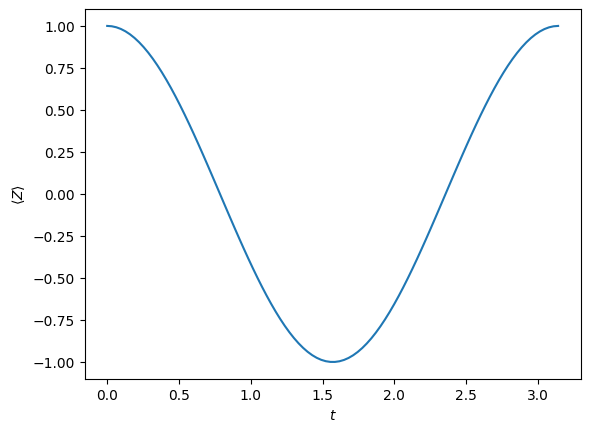

In [3]:
# the simulator also computes the values of <Z> at intermediate times
times = [float(x) for x in res.value_data.keys()]
values = [res.value_data[x].re for x in res.value_data.keys()]
plt.plot(times, values, "-")
plt.xlabel("$t$")
plt.ylabel(r"$\langle Z\rangle$");

In [5]:
job = sched.to_job()
# submit : res contains the results
res = qpu.submit(job)
for sample in res:
    print(sample.state, sample.probability)

|0> 0.9999974325923237
|1> 2.567407676086916e-06


## Time-dependent example

Let us now just modify
$$H = t \sigma_x $$.

In [ ]:
from qat.core import Variable
t = Variable("t", float)

sched2 = Schedule(drive = [(2.*t, H)], tmax=3.14)
# (in general, the drive is a list of pairs of the form (lambda(t), P)
# where lambda(t) is a (possibly) time-dependent coefficient and P an operator (observable) )

# construct a job from the schedule
# a job is a schedule + an observable (here the observable is Z)
job2 = sched2.to_job(observable=Observable.z(0, 1))
# submit : res contains the results
res2 = qpu.submit(job2)



In [ ]:
times2 = [float(x) for x in res2.value_data.keys()]
values2 = [res2.value_data[x].re for x in res2.value_data.keys()]
plt.plot(times2, values2, "-", label=r"$\langle Z(t) \rangle$, time-dependent case")
plt.plot(times, values, "--", label=r"$\langle Z(t) \rangle$, time-independent case")

plt.xlabel("$t$")
plt.ylabel(r"$\langle Z\rangle$");
plt.legend();